In [1]:
import pandas as pd

In [2]:
import os

In [3]:
def servers_load_to_dataframe(problem_type, algorithm, heuristic, i):
    filename = "results/" + problem_type + "_" + algorithm + "_" + heuristic + "/servers_load/servers_load" + str(i) + ".csv"
    
    if os.stat(filename).st_size == 0:
        return pd.read_csv(filename, header=None, names=['core', 'memory', 'ssd', 'nic'])
    return pd.read_csv(filename, header=None, names=['core', 'memory', 'ssd', 'nic'], index_col=0)

In [4]:
def utilization_means(problem_type, algorithm, heuristic):
    core_means = list()
    memory_means = list()
    ssd_means = list()
    nic_means = list()
    
    for i in range(100):
        df = servers_load_to_dataframe(problem_type, algorithm, heuristic, i + 1)
        
        core_means.append(df.core.mean())
        memory_means.append(df.memory.mean())
        ssd_means.append(df.ssd.mean())
        nic_means.append(df.nic.mean())
    
    return core_means, memory_means, ssd_means, nic_means

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [8]:
def print_utilization_means_distribution(problem_type, algorithm, heuristic):
    core_means, memory_means, ssd_means, nic_means = utilization_means(problem_type, algorithm, heuristic)
    plt.figure(figsize=(12, 7))
    plt.subplot(2, 2, 1)
    plt.title('CPU', fontsize=15)
    sns.distplot([x for x in core_means if str(x) != 'nan'], hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})
    plt.subplot(2, 2, 2)
    plt.title('Memory', fontsize=15)
    sns.distplot([x for x in memory_means if str(x) != 'nan'], hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})
    plt.subplot(2, 2, 3)
    plt.title('SSD', fontsize=15)
    sns.distplot([x for x in ssd_means if str(x) != 'nan'], hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})
    plt.subplot(2, 2, 4)
    plt.title('Network bandwidth', fontsize=15)
    sns.distplot([x for x in nic_means if str(x) != 'nan'], hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})
    return core_means, memory_means, ssd_means, nic_means

###### FirstFit

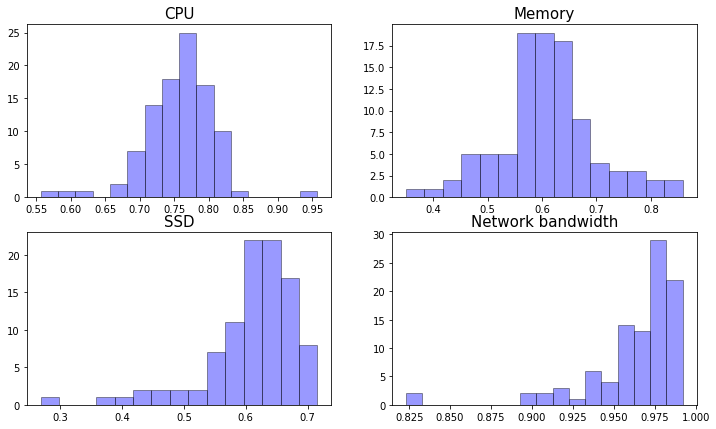

In [9]:
ff_core_means, ff_memory_means, ff_ssd_means, ff_nic_means = print_utilization_means_distribution("dynamicplacement", "firstfit", "none")

###### BestFit с эвристикой Sum

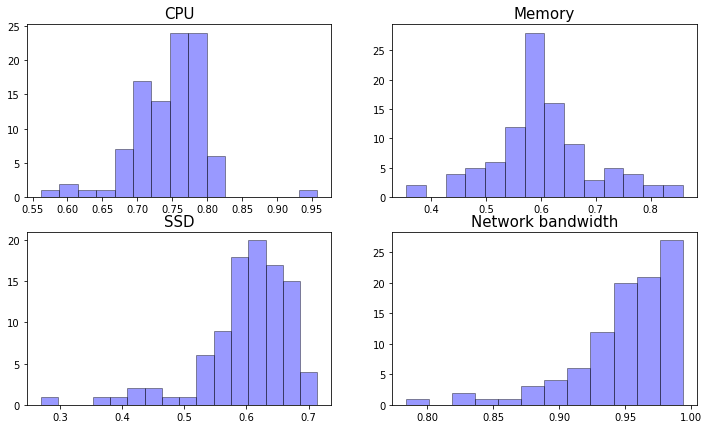

In [10]:
bf_sum_core_means, bf_sum_memory_means, bf_sum_ssd_means, bf_sum_nic_means = print_utilization_means_distribution("dynamicplacement", "bestfit", "sum")

###### BestFit с эвристикой Prod

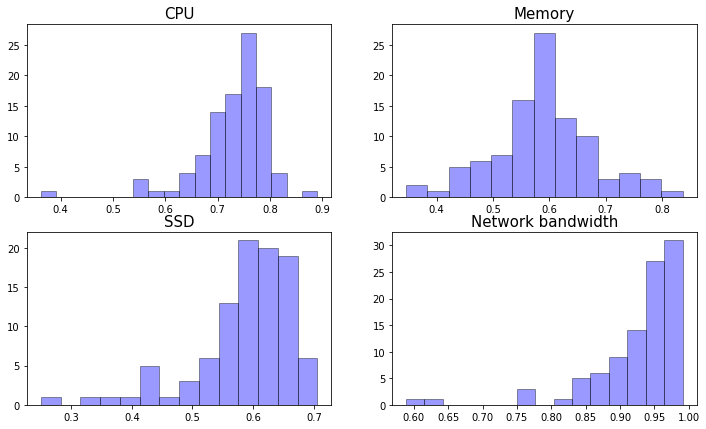

In [11]:
bf_prod_core_means, bf_prod_memory_means, bf_prod_ssd_means, bf_prod_nic_means = print_utilization_means_distribution("dynamicplacement", "bestfit", "prod")

###### Mishra & Sahoo с целью балансировки нагрузки

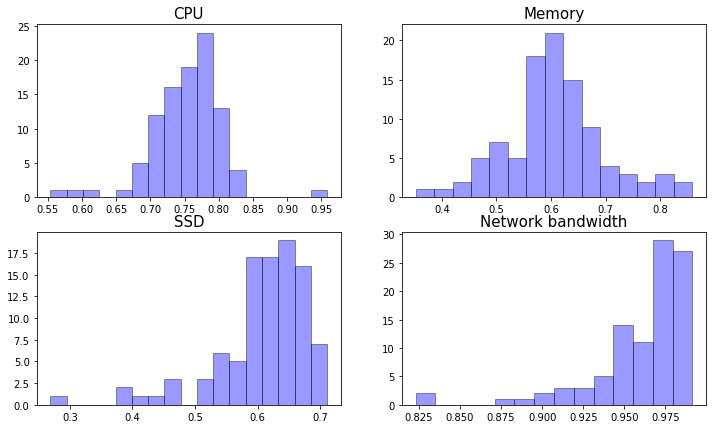

In [12]:
ms_lb_core_means, ms_lb_memory_means, ms_lb_ssd_means, ms_lb_nic_means = print_utilization_means_distribution("dynamicplacement", "mishrasahoo", "loadbalance")

###### Mishra & Sahoo с целью консолидации

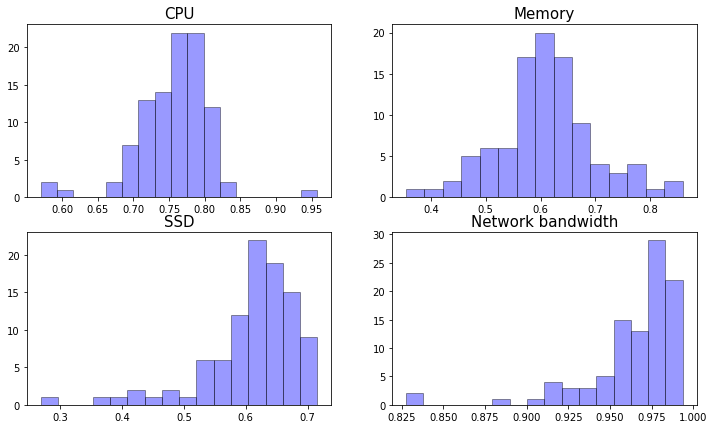

In [13]:
ms_c_core_means, ms_c_memory_means, ms_c_ssd_means, ms_c_nic_means = print_utilization_means_distribution("dynamicplacement", "mishrasahoo", "consolidate")

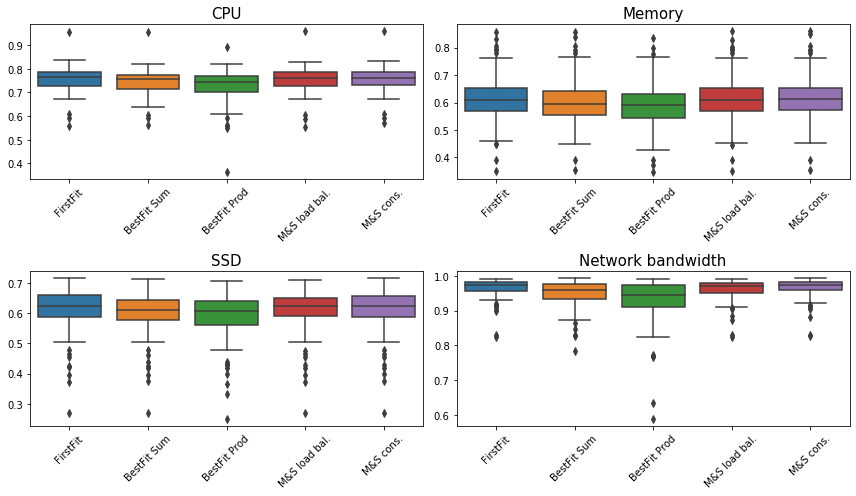

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

axs[0][0].set_title('CPU', fontsize=15)
sns.boxplot(['FirstFit', 'BestFit Sum', 'BestFit Prod', 'M&S load bal.', 'M&S cons.'], 
           [[x for x in ff_core_means if str(x) != 'nan'], [x for x in bf_sum_core_means if str(x) != 'nan'],
            [x for x in bf_prod_core_means if str(x) != 'nan'], [x for x in ms_lb_core_means if str(x) != 'nan'],
            [x for x in ms_c_core_means if str(x) != 'nan']], ax=axs[0][0])
for tick in axs[0][0].get_xticklabels():
    tick.set_rotation(45)

axs[0][1].set_title('Memory', fontsize=15)
sns.boxplot(['FirstFit', 'BestFit Sum', 'BestFit Prod', 'M&S load bal.', 'M&S cons.'], 
           [[x for x in ff_memory_means if str(x) != 'nan'], [x for x in bf_sum_memory_means if str(x) != 'nan'],
            [x for x in bf_prod_memory_means if str(x) != 'nan'], [x for x in ms_lb_memory_means if str(x) != 'nan'],
            [x for x in ms_c_memory_means if str(x) != 'nan']], ax=axs[0][1])
for tick in axs[0][1].get_xticklabels():
    tick.set_rotation(45)

axs[1][0].set_title('SSD', fontsize=15)
sns.boxplot(['FirstFit', 'BestFit Sum', 'BestFit Prod', 'M&S load bal.', 'M&S cons.'], 
           [[x for x in ff_ssd_means if str(x) != 'nan'], [x for x in bf_sum_ssd_means if str(x) != 'nan'],
            [x for x in bf_prod_ssd_means if str(x) != 'nan'], [x for x in ms_lb_ssd_means if str(x) != 'nan'],
            [x for x in ms_c_ssd_means if str(x) != 'nan']], ax=axs[1][0])
for tick in axs[1][0].get_xticklabels():
    tick.set_rotation(45)

axs[1][1].set_title('Network bandwidth', fontsize=15)
sns.boxplot(['FirstFit', 'BestFit Sum', 'BestFit Prod', 'M&S load bal.', 'M&S cons.'], 
           [[x for x in ff_nic_means if str(x) != 'nan'], [x for x in bf_sum_nic_means if str(x) != 'nan'],
            [x for x in bf_prod_nic_means if str(x) != 'nan'], [x for x in ms_lb_nic_means if str(x) != 'nan'],
            [x for x in ms_c_nic_means if str(x) != 'nan']], ax=axs[1][1])
for tick in axs[1][1].get_xticklabels():
    tick.set_rotation(45)

fig.tight_layout()